In [5]:
!wget -c https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py

'wget' is not recognized as an internal or external command,
operable program or batch file.


In [1]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy as np
import torch
# import helper
import matplotlib.pyplot as plt

In [3]:
from torchvision import datasets,transforms

transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
                               ])
trainset=datasets.MNIST('MNIST_data/',download=True,train=True, transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [4]:
dataiter=iter(trainloader)
images,labels = dataiter.next()
print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


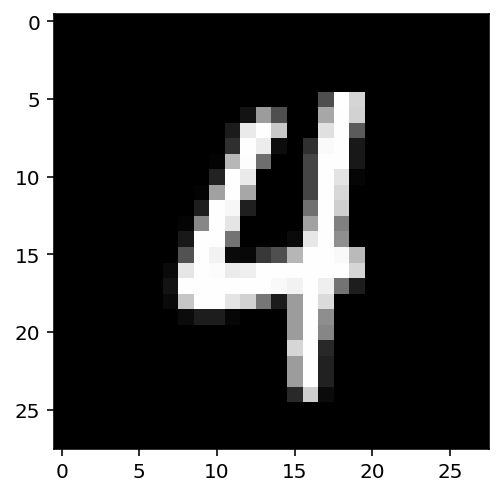

In [5]:
plt.imshow(images[1].numpy().squeeze(),cmap='Greys_r');

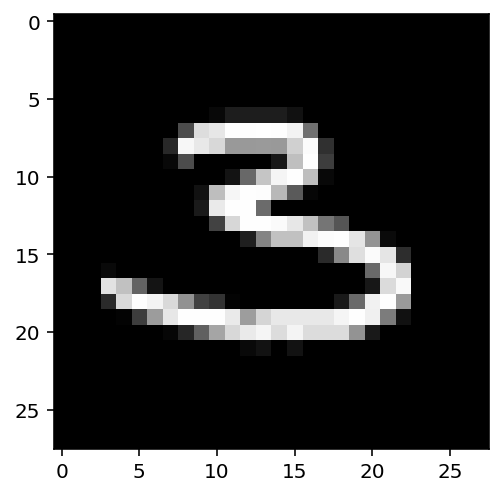

In [6]:
plt.imshow(images[4].numpy().squeeze(),cmap='Greys_r')

    Multi-layer Neural Network:
    input 784, 
    256 hidden units, 
    10 output unites for 10 classes

In [7]:
def activation(x):
    return 1/(1+torch.exp(-x))
#flatten
inputs=images.view(images.shape[0], -1) #-1 -> take batch size=64 negative one chooses appropriate size to get total number of elements
# make second dimensions 784 so the taht no of element remain same even after reshaping

#create parameters
w1=torch.randn(784,256)
b1=torch.randn(256)

w2 = torch.randn(256,10)
b2=torch.randn(10)

h= activation(torch.mm(inputs, w1)+b1)
out=torch.mm(h,w2)+b2

print(out.shape)
print(out)

torch.Size([64, 10])
tensor([[ 3.6984e+00, -4.1961e-01,  2.0248e+01, -2.6728e+00, -1.6160e+01,
         -3.7976e+00, -1.3346e+00, -6.0346e+00, -3.3084e+00,  9.9714e-02],
        [-4.0494e+00,  1.1423e+01,  8.0187e+00,  7.6412e-01, -2.9866e+01,
          4.8103e+00,  9.1993e+00, -1.6335e+01, -1.2039e+00,  1.0688e+01],
        [-5.2276e+00,  4.2842e+00,  6.9447e+00, -1.7447e+00, -2.7015e+01,
         -1.3060e+01,  1.1554e+01, -1.0532e+01, -1.4583e+01,  1.8333e+01],
        [-2.4373e+00,  2.0221e+01,  5.2327e+00, -1.0058e+00, -2.5251e+01,
         -7.9954e+00,  1.5494e+01, -1.2843e+01, -2.1371e+00,  7.7233e+00],
        [-4.0699e+00,  9.8278e+00,  7.2808e+00,  2.9181e+00, -3.1531e+01,
          1.5880e+00,  1.0770e+01, -1.3176e+01, -9.8554e+00,  2.1147e+01],
        [ 2.1046e+00,  9.8041e+00,  1.7277e+00, -1.7385e+00, -2.6647e+01,
         -1.8660e+00,  7.6266e+00, -1.7338e+01, -2.6777e+00,  8.1912e+00],
        [ 2.1673e-01,  1.0797e+01,  4.4738e+00,  5.8442e+00, -2.6848e+01,
         -3

In [8]:
#Softmax- for probability distribution of output 
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1) #dim=1 takes the sum across the columns || view = reshape -> 1 valye for each 64 rows

prob=softmax(out)
print(prob.shape)
print(prob.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [9]:
#Neural network model
from torch import nn

In [15]:
class network(nn.Module):
    def __init__(self):
        super().__init__()# super will run the init method of nn.module || pytorch will know to register all the diffrent layers and operation  || to track of network
        self.hidden = nn.Linear(784,256) # operation for the liniear tranformation (sized of input, ouput)
        self.output=nn.Linear(256,10)
        
        self.sigmoid=nn.Sigmoid()
        self.softmax=nn.Softmax(dim=1)
        
    def forward(self,x):
        x= self.hidden(x)
        x=self.sigmoid(x)
        x=self.output(x)
        x=self.softmax(x)
        
        return x

In [11]:
model= network() 
model

network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [12]:
#function for sigmoid and softmax
import torch.nn.functional as f

class network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784,256)
        self.output= nn.Linear(256,10)
        
    def forward(self,x): #element operation ||  no extra parameter || purely functional
        x= f.sigmoid(self.hidden(x))# hidden layer with sigmoid activation 
        x= f.softmax(Self.output(x), dim=1)#output layer with softmax activation
        
        return x

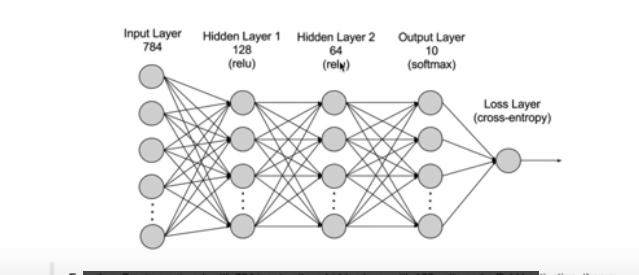

In [2]:
import torch
from torch import nn
import torch.nn.functional as f
from torchvision import datasets, transforms

transform= transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5)),
])

trainset= datasets.MNIST('-/.pytorch/MNIST_data/',download=True, train=True, transform=transform)
trainloader= torch.utils.data.DataLoader(trainset, batch_size=64,shuffle=True)

In [3]:
model= nn.Sequential(nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128,64),
                    nn.ReLU(),
                    nn.Linear(64,10)
                    )
criterion = nn.CrossEntropyLoss()
images, labels = next(iter(trainloader))
images=images.view(images.shape[0],-1) #flatten images 

logits = model(images)
loss= criterion(logits, labels)
print(loss)

tensor(2.3002, grad_fn=<NllLossBackward>)


In [4]:
model = nn.Sequential(nn.Linear(784,128),
                     nn.ReLU(),
                     nn.Linear(128,64),
                     nn.ReLU(),
                     nn.Linear(64,10),
                     nn.LogSoftmax(dim=1)
                     )
criterion= nn.NLLLoss() #negative log likelihood loss
images, labels= next(iter(trainloader))
images=images.view(images.shape[0],-1)
logits= model(images)
loss = criterion(logits, labels)
print(loss)

tensor(2.3081, grad_fn=<NllLossBackward>)


In [23]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n',model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006],
        [-0.0024, -0.0024, -0.0024,  ..., -0.0024, -0.0024, -0.0024],
        [ 0.0028,  0.0028,  0.0028,  ...,  0.0028,  0.0028,  0.0028],
        ...,
        [-0.0032, -0.0032, -0.0032,  ..., -0.0032, -0.0032, -0.0032],
        [ 0.0001,  0.0001,  0.0001,  ...,  0.0001,  0.0001,  0.0001],
        [ 0.0006,  0.0006,  0.0006,  ...,  0.0006,  0.0006,  0.0006]])


In [24]:
from torch import optim
#to optimes the parameter with the given learning rate
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [25]:
print('Initial weights - ', model[0].weight)
images, labels= next(iter(trainloader))
images.resize_(64, 784)
optimizer.zero_grad() #clear gradients || otherwise previous gradient will also bet accumulated
output= model.forward(images) #forward pass
loss= criterion(output, labels)
loss.backward() #backward pass
print('Gradient -',model[0].weight.grad) #before updating weights

Initial weights -  Parameter containing:
tensor([[-1.2171e-02, -1.3292e-02,  4.2469e-03,  ..., -1.7059e-02,
          1.3383e-02,  3.0325e-02],
        [ 1.6948e-02,  2.2438e-03, -1.8882e-02,  ...,  2.9498e-02,
         -3.4654e-02,  2.4694e-03],
        [ 3.2453e-02, -2.0024e-02,  1.2093e-02,  ..., -7.0252e-03,
         -3.0361e-02, -1.6655e-02],
        ...,
        [-1.1351e-02, -1.1127e-02, -3.4692e-02,  ..., -1.7758e-02,
         -3.3517e-02, -1.3977e-02],
        [-3.0201e-02, -5.4997e-04,  9.3792e-05,  ...,  2.9079e-03,
         -3.1853e-02, -2.7099e-02],
        [ 1.6334e-02, -2.4600e-02,  1.8937e-02,  ...,  1.4167e-02,
         -1.7065e-02,  3.3880e-03]], requires_grad=True)
Gradient - tensor([[-0.0028, -0.0028, -0.0028,  ..., -0.0028, -0.0028, -0.0028],
        [-0.0011, -0.0011, -0.0011,  ..., -0.0011, -0.0011, -0.0011],
        [ 0.0023,  0.0023,  0.0023,  ...,  0.0023,  0.0023,  0.0023],
        ...,
        [ 0.0017,  0.0017,  0.0017,  ...,  0.0017,  0.0017,  0.0017],
   

In [26]:
optimizer.step()
print('Updated weights - ',model[0].weight)

Updated weights -  Parameter containing:
tensor([[-0.0121, -0.0133,  0.0043,  ..., -0.0170,  0.0134,  0.0304],
        [ 0.0170,  0.0023, -0.0189,  ...,  0.0295, -0.0346,  0.0025],
        [ 0.0324, -0.0200,  0.0121,  ..., -0.0070, -0.0304, -0.0167],
        ...,
        [-0.0114, -0.0111, -0.0347,  ..., -0.0178, -0.0335, -0.0140],
        [-0.0302, -0.0005,  0.0001,  ...,  0.0029, -0.0318, -0.0271],
        [ 0.0163, -0.0246,  0.0190,  ...,  0.0142, -0.0171,  0.0034]],
       requires_grad=True)


In [27]:
model= nn.Sequential(nn.Linear(784,128),
                    nn.ReLU(),
                    nn.Linear(128, 64),
                    nn.ReLU(),
                    nn.Linear(64,10),
                    nn.LogSoftmax(dim=1))
criterion= nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.003) #stochastic gradient descent

epochs=5
for e in range(epochs):
    running_loss =0
    for images, labels in trainloader:
        images= images.view(images.shape[0],-1)
        
        optimizer.zero_grad()
        
        output = model.forward(images)
        loss= criterion(output, labels)
        loss.backward()
        
        optimizer.step()
        running_loss += loss.item()
        
    else:
        print(f"Training loss : {running_loss/len(trainloader)}")

Training loss : 1.986168030228442
Training loss : 0.9247737685119165
Training loss : 0.5293083827950553
Training loss : 0.4294479981160113
Training loss : 0.38540767045862384


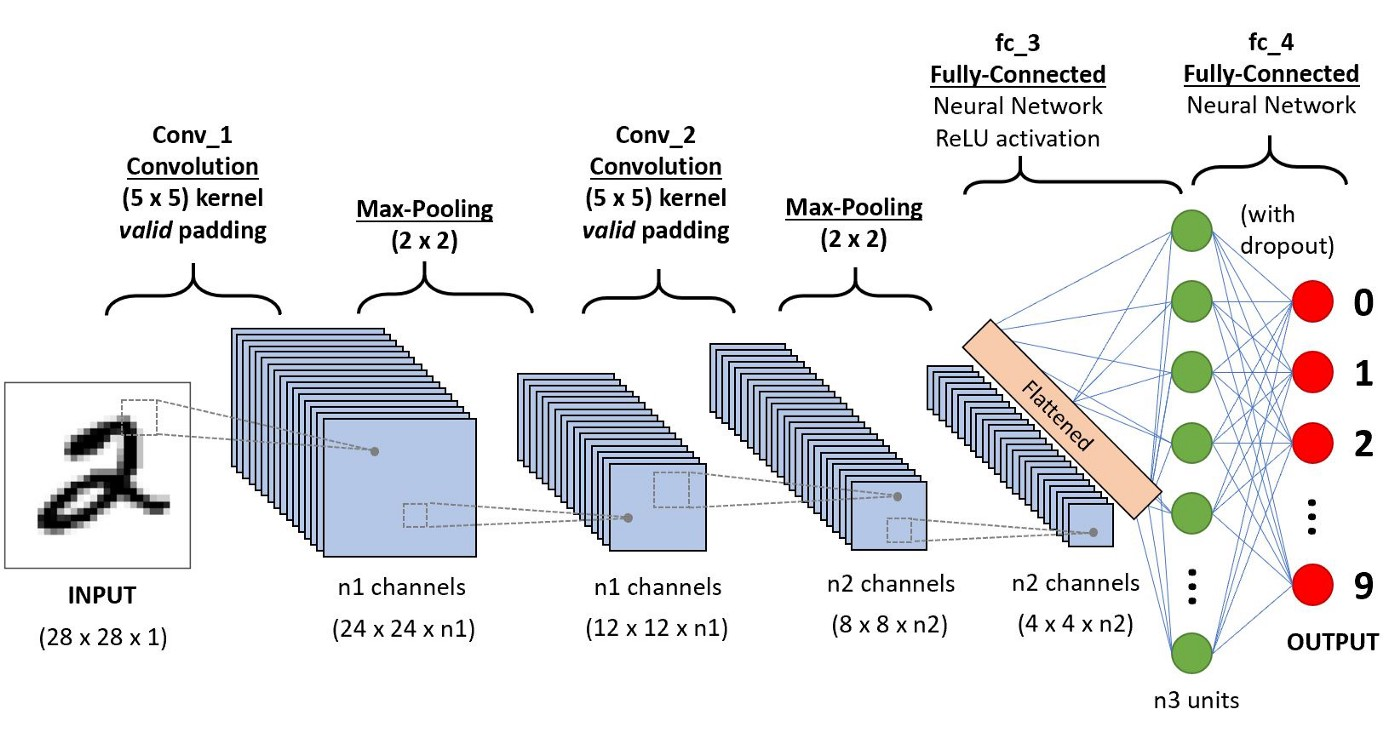